[*********************100%***********************]  31 of 31 completed


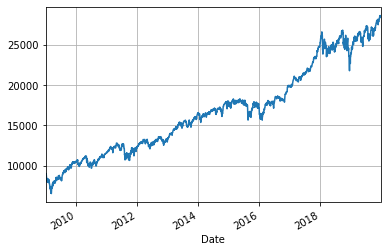

In [101]:
# Download Data from Yahoo Finance
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
from cvxopt import matrix
from cvxopt import solvers
# Pour lire les données de Yahoo Finance, vous devez installer le toolbox yfinance
import yfinance as yf 
import numpy as np
start_sp = dt.datetime(2008,12,31)
end_sp = dt.datetime(2019, 12,31)

# Dow Jones index
# 1st Dow Jones Index + 30 components
dow30 = ['^DJI','AXP', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'DD', 'XOM',
         'GE', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM',
         'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG',
         'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WMT', 'DIS']

Dow_data = yf.download(dow30, start=start_sp, end=end_sp,group_by="ticker")

# To access the adjusted close price, use
Dow_data['^DJI']['Close']

# Graph data
Dow_data['^DJI']['Close'].plot(grid=True)

Question 1

I.	Fournir une analyse descriptive de l’indice et de ses composantes

a. Calculer les rendements quotidiens en prenant le prix de base ajusté pour les dividendes 

In [102]:
Dow_data

^DJI                                            \
                    Open          High           Low         Close   
Date                                                                 
2008-12-31   8666.480469   8842.660156   8664.889648   8776.389648   
2009-01-02   8772.250000   9065.280273   8760.780273   9034.690430   
2009-01-05   9027.129883   9034.370117   8892.360352   8952.889648   
2009-01-06   8954.570312   9088.059570   8940.950195   9015.099609   
2009-01-07   8996.940430   8996.940430   8719.919922   8769.700195   
...                  ...           ...           ...           ...   
2019-12-24  28572.570312  28576.800781  28503.210938  28515.449219   
2019-12-26  28539.460938  28624.099609  28535.150391  28621.390625   
2019-12-27  28675.339844  28701.660156  28608.980469  28645.259766   
2019-12-30  28654.759766  28664.689453  28428.980469  28462.140625   
2019-12-31  28414.640625  28547.349609  28376.490234  28538.439453   

                                                V                          \
               Adj Close       Volume        Open        High         Low   
Date                                                                        
2008-12-31   8776.389648  226760000.0   12.652500   13.192500   12.650000   
2009-01-02   9034.690430  213700000.0   13.230000   13.427500   13.060000   
2009-01-05   8952.889648  233760000.0   13.250000   13.825000   13.250000   
2009-01-06   9015.099609  215410000.0   13.625000   14.495000   13.625000   
2009-01-07   8769.700195  266710000.0   14.172500   14.487500   13.997500   
...                  ...          ...         ...         ...         ...   
2019-12-24  28515.449219   86150000.0  187.100006  188.020004  186.910004   
2019-12-26  28621.390625  155970000.0  187.889999  189.179993  187.699997   
2019-12-27  28645.259766  182280000.0  189.740005  189.889999  188.470001   
2019-12-30  28462.140625  181600000.0  189.309998  189.479996  187.119995   
2019-12-31  28538.439453  193340000.0  187.059998  188.000000  186.539993   

                        ...          GS                                      \
                 Close  ...         Low       Close   Adj Close      Volume   
Date                    ...                                                   
2008-12-31   13.112500  ...   81.120003   84.389999   72.561394  14894100.0   
2009-01-02   13.360000  ...   82.190002   86.760002   74.599205  14088500.0   
2009-01-05   13.455000  ...   85.459999   88.779999   76.336082  15996700.0   
2009-01-06   14.402500  ...   87.720001   88.709999   76.275871  21551800.0   
2009-01-07   14.090000  ...   83.650002   84.500000   72.655975  12465500.0   
...                ...  ...         ...         ...         ...         ...   
2019-12-24  187.570007  ...  228.369995  229.910004  229.910004    467700.0   
2019-12-26  189.160004  ...  229.990005  231.210007  231.210007   1704000.0   
2019-12-27  189.389999  ...  230.470001  230.660004  230.660004   1343900.0   
2019-12-30  187.830002  ...  229.500000  229.800003  229.800003   1494500.0   
2019-12-31  187.899994  ...  228.669998  229.929993  229.929993   1447200.0   

                    PG                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2008-12-31   61.349998   62.200001   61.070000   61.820000   43.484673   
2009-01-02   61.689999   62.970001   61.060001   62.799999   44.174007   
2009-01-05   62.320000   62.439999   61.590000   62.349998   43.857475   
2009-01-06   62.500000   62.950001   61.509998   62.169998   43.730865   
2009-01-07   61.330002   61.660000   60.639999   61.080002   42.964157   
...                ...         ...         ...         ...         ...   
2019-12-24  124.790001  125.309998  124.580002  125.220001  124.480438   
2019-12-26  125.099998  125.750000  124.870003  125.220001  124.480438   
2019-12-27  125.559998  126.300003  125

In [103]:
# Base de donnees avec seulement les colonnes Adj Close
rendementsQuotidien = np.zeros((31,len(Dow_data)))

for i in range(31):
    rendementsQuotidien[:][i] = (Dow_data[dow30[i]]['Adj Close'])
rendementsQuotidien = np.transpose(rendementsQuotidien)
rendementsQuotidien = pd.DataFrame(rendementsQuotidien, index = Dow_data.index, columns = dow30)

In [105]:
rendementsQuotidien

,^DJI,AXP,AAPL,BA,CAT,CSCO,CVX,DD,XOM,GE,...,NKE,PFE,PG,TRV,UNH,UTX,VZ,V,WMT,DIS
Date,,,,,,,,,,,,,,,,,,,,,
2008-12-31,8776.389648,15.380423,10.583897,31.760571,31.672358,12.618067,48.506824,16.967617,55.675411,10.715392,...,8.690716,11.514289,43.484673,34.374229,22.751699,41.023972,18.278536,10.506693,42.807034,19.538342
2009-01-02,9034.690430,16.027143,11.253528,33.680935,33.260574,13.128983,50.179005,17.327436,56.937794,11.290849,...,9.041756,11.878381,44.174007,34.374229,23.598473,42.057232,18.677536,10.705006,43.662266,20.597496
2009-01-05,8952.889648,16.541204,11.728474,34.365715,32.672096,13.245105,50.270836,16.922636,56.930786,10.999813,...,9.106508,11.806864,43.857475,33.864697,23.213583,41.559723,17.512888,10.781126,43.158302,20.235834
2009-01-06,9015.099609,17.469830,11.535025,34.469925,32.473557,13.771499,50.723324,18.047073,56.003220,11.151946,...,8.922467,11.572806,43.730865,32.830437,22.666164,42.003651,17.232512,11.540335,42.776493,20.933319
2009-01-07,8769.700195,16.733908,11.285772,33.316200,30.963327,13.407664,48.500263,18.080803,54.573521,10.655862,...,8.598697,11.371260,42.964157,31.529989,22.495098,40.962753,17.468224,11.289938,42.409962,19.960283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,28515.449219,124.309135,283.596924,331.030457,146.452713,47.431313,118.949715,63.779999,69.028984,11.190000,...,100.139999,38.892712,124.480438,135.830002,294.540009,148.861588,60.648827,187.298752,119.510002,145.289993
2019-12-26,28621.390625,124.976830,289.223602,327.968689,147.187561,47.500801,119.206718,63.730000,69.137428,11.230000,...,100.709999,38.981800,124.480438,136.289993,295.649994,149.996185,60.658726,188.886444,119.519997,145.699997
2019-12-27,28645.259766,124.757584,289.113831,328.187408,147.247147,47.421387,118.910187,63.730000,68.900826,11.180000,...,101.570000,38.922405,125.345299,136.800003,295.970001,149.568207,60.896252,189.116104,119.589996,145.750000


In [106]:
# Calcul du rendement 5 jours
rendements5j = pd.DataFrame(np.zeros((2770,31)),columns = dow30)
date5j=[]
date = rendementsQuotidien.index[4]
tickers=0
rempli = True
for titre in dow30:
    while date < end_sp:
        roi = None
        try:
            past_date = date - np.timedelta64(5, "D")
            current_value = rendementsQuotidien.loc[date][titre]
            past_value = rendementsQuotidien.loc[past_date][titre]
            roi = (current_value - past_value)/past_value * 100 
            rendements5j.loc[tickers][titre] = roi
            tickers += 1
            if rempli:
                date5j.append(date)
        except KeyError:
            pass        
        date = date + np.timedelta64(5, "D")
    tickers=0
    date = rendementsQuotidien.index[4] 
    rempli = False
rendements4 = rendements5j.iloc[:len(date5j)]
rendements4 = rendements4.drop(['^DJI'], axis='columns')
rendements5 = np.transpose(rendements4)

In [114]:
# Moyenne, variance, corrélation des 30 titres
moyenne5j = np.mean(rendements5,axis=0)
EcartType = np.std(rendements5,axis=0)
MatriceCorr = np.corrcoef(rendements5)
MatriceCov = np.cov(rendements5)
MatriceCov

30

II.	Trouver le portefeuille à variance minimale
a.	Somme des poids = 1
b.	Poids ≥ 0

In [115]:
# Construction des matrices pour l'optimisation
g = np.zeros((len(MatriceCov),len(MatriceCov)))
np.fill_diagonal(g,-1)
a = np.ones((len(MatriceCov),len(MatriceCov)))
b1=np.ones(len(MatriceCov))
b2=np.transpose(b1)

In [116]:
# Optimisation avec cvxopt avec seulement 2 contraintes : somme poids=1 + poids>0
P = matrix(MatriceCov, tc='d')
q = matrix(np.zeros(len(MatriceCov)), tc='d')
G = matrix(g, tc='d')
h = matrix(np.zeros(len(MatriceCov)), tc='d')
A = matrix(a, tc='d')
b = matrix(b2, tc='d')

# Construct the QP, invoke solver
sol = solvers.qp(P,q,G,h,A,b)
# Extract optimal value and solution
print(sol['x']) 
sol['primal objective'] 
# Bien sur ca fonctionne pas

ValueError: Rank(A) < p or Rank([P; A; G]) < n

III.Trouver le portefeuille à variance minimale avec les contraintes additionnelles
a.	Poids minimum = .02 ou 2 %
b.	Poids maximum = .20 ou 20 %

In [ ]:
# Optimisation avec cvxopt avec seulement 4 contraintes : somme poids=1 + poids>0 + max 0,2 et min 0,02

IV.	Tracer la frontière efficiente
a.	10 portefeuilles
i.	Rendement min. = Portefeuille à variance minimal
ii.	Rendement max. = 90 % du rendement